### Libraries:

In [1]:
# !pip install shap

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn import preprocessing

### Warnings:

In [3]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="The objective has been evaluated at this point before.")

### Read dataset:

In [4]:
import glob

csv_path = r'C:\Users\User\Desktop\ML- Final Project\Brainster data\1f - Data set'

csv_files = glob.glob(f'{csv_path}/*.csv')

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)


df = pd.concat(dfs)

In [5]:
df

,Study_Folder,Subject_Folder,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,...,X_Predictions,Y_Predictions,Anger_Probability,Contempt_Probability,Disgust_Probability,Fear_Probability,Happiness_Probability,Neutral_Probability,Sadness_Probability,Surprise_Probability
0,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,0,235.0,195.0,204.0,204.0,269.0,377.0,...,0.124451,0.166405,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,1,235.0,196.0,201.0,201.0,268.0,377.0,...,0.124451,0.166405,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,2,236.0,196.0,201.0,201.0,268.0,377.0,...,0.124451,0.166405,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,3,236.0,196.0,201.0,201.0,268.0,377.0,...,0.124451,0.166405,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0eb02000-fe04-480d-9da4-b60e758d46e7,videos,0,4,235.0,195.0,203.0,203.0,269.0,377.0,...,0.124451,0.166405,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,200,200.0,162.0,233.0,233.0,243.0,353.0,...,0.124735,0.721234,0.03,0.10,0.00,0.45,0.02,0.01,0.30,0.09
3415,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,201,201.0,160.0,233.0,233.0,243.0,353.0,...,0.223992,0.539739,0.14,0.08,0.08,0.08,0.08,0.11,0.43,0.00
3416,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,202,200.0,162.0,232.0,232.0,244.0,352.0,...,0.124735,0.733096,0.06,0.12,0.06,0.20,0.05,0.02,0.45,0.04
3417,7f1cb219-f275-4148-9658-67b1c26a6649,videos,9806,203,200.0,159.0,236.0,236.0,243.0,353.0,...,0.124204,0.717675,0.05,0.06,0.01,0.36,0.03,0.03,0.28,0.18


In [6]:
# df = pd.read_csv('data1_filled.csv')
# df

In [7]:
# from google.colab import files
# uploaded = files.upload()

In [8]:
# import pandas as pd
# import io

# df = pd.read_csv(io.BytesIO(uploaded['data1_filled.csv']))
# df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106630 entries, 0 to 3418
Columns: 169 entries, Study_Folder to Surprise_Probability
dtypes: float64(165), int64(2), object(2)
memory usage: 138.3+ MB


In [10]:
# Checking NaN values
df.isna().sum()

Study_Folder             0
Subject_Folder           0
Stimuli                  0
Frame Number             0
Face_Y                   0
                        ..
Fear_Probability         0
Happiness_Probability    0
Neutral_Probability      0
Sadness_Probability      0
Surprise_Probability     0
Length: 169, dtype: int64

### Drop columns:

In [11]:
# df.drop(['Study_Folder','Subject_Folder'], axis = 1, inplace = True)

In [12]:
# df

### Define Stimuli, X,Y:

In [13]:
df.columns

Index(['Study_Folder', 'Subject_Folder', 'Stimuli', 'Frame Number', 'Face_Y',
       'Face_X', 'Face_W', 'Face_H', 'Right_Eye_X', 'Right_Eye_Y',
       ...
       'X_Predictions', 'Y_Predictions', 'Anger_Probability',
       'Contempt_Probability', 'Disgust_Probability', 'Fear_Probability',
       'Happiness_Probability', 'Neutral_Probability', 'Sadness_Probability',
       'Surprise_Probability'],
      dtype='object', length=169)

In [14]:
# features_columns = ['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W','Face_H',
#                     'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y', 'Face_Angle']

target_columns=['X_Predictions', 'Y_Predictions']

In [15]:
X = df.drop(target_columns, axis=1)

In [16]:
X = X.drop(['Study_Folder', 'Subject_Folder'],axis=1)

In [17]:
X

,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,...,Edges_9,Edges_10,Anger_Probability,Contempt_Probability,Disgust_Probability,Fear_Probability,Happiness_Probability,Neutral_Probability,Sadness_Probability,Surprise_Probability
0,0,0,235.0,195.0,204.0,204.0,269.0,377.0,269.0,296.0,...,25.012184,28.777856,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,1,235.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,...,23.978038,28.036317,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0,2,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,...,23.947083,28.590859,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,3,236.0,196.0,201.0,201.0,268.0,377.0,268.0,296.0,...,24.607605,27.120898,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,4,235.0,195.0,203.0,203.0,269.0,377.0,268.0,296.0,...,23.163124,28.295339,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,9806,200,200.0,162.0,233.0,233.0,243.0,353.0,256.0,270.0,...,51.210973,28.081694,0.03,0.10,0.00,0.45,0.02,0.01,0.30,0.09
3415,9806,201,201.0,160.0,233.0,233.0,243.0,353.0,255.0,270.0,...,13.050290,30.444632,0.14,0.08,0.08,0.08,0.08,0.11,0.43,0.00
3416,9806,202,200.0,162.0,232.0,232.0,244.0,352.0,256.0,270.0,...,35.954662,30.065032,0.06,0.12,0.06,0.20,0.05,0.02,0.45,0.04
3417,9806,203,200.0,159.0,236.0,236.0,243.0,353.0,255.0,270.0,...,27.572741,26.310435,0.05,0.06,0.01,0.36,0.03,0.03,0.28,0.18


In [18]:
y=df[target_columns]

In [19]:
X_train= X[X['Stimuli']<= 11]

In [20]:
X_test= X[X['Stimuli']> 11]

In [21]:
y_train= y[X['Stimuli']<= 11]

In [22]:
y_test= y[X['Stimuli']> 11]

### Split data:

In [23]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [24]:
# X_train, y_train, = train_test_split(X_train_valid, y_train_valid, test_size=0.3,stratify =X_train_valid['Stimuli'] ,random_state=42)

In [25]:
print("Whole dataset :",len(df))
print("X Train size", len(X_train))
print("y Train size", len(y_train))
print("X Test size", len(X_test))
print("y Test size", len(y_test))

Whole dataset : 106630
X Train size 54912
y Train size 54912
X Test size 51718
y Test size 51718


In [26]:
print("X Train shape", X_train.shape)
print("y Train shape", y_train.shape)
print("X Test shape", X_test.shape)
print("y Test shape", y_test.shape)

X Train shape (54912, 165)
y Train shape (54912, 2)
X Test shape (51718, 165)
y Test shape (51718, 2)


### Drop columns:

In [27]:
# drop_column = ['Stimuli','Frame Number']

In [28]:
# X.drop(columns = drop_column, inplace=True)

In [29]:
# X_train.drop(columns = drop_column, inplace=True)

In [30]:
# X_valid.drop(columns = drop_column, inplace=True)

In [31]:
# X_test.drop(columns = drop_column, inplace=True)

### MinMaxScaler:

In [32]:
minmax_scaler = preprocessing.MinMaxScaler()
X_train_scal = minmax_scaler.fit_transform(X_train)
X_test_scal = minmax_scaler.transform(X_test)

In [33]:
X_train_scal

array([[0.        , 0.        , 0.48668281, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00666667, 0.48668281, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01333333, 0.48910412, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.96666667, 0.3874092 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97333333, 0.38498789, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.98      , 0.38498789, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
X_test_scal

array([[1.29545455e+02, 0.00000000e+00, 5.01210654e-01, ...,
        0.00000000e+00, 6.00000000e-02, 0.00000000e+00],
       [1.29545455e+02, 6.66666667e-03, 5.03631961e-01, ...,
        0.00000000e+00, 6.00000000e-02, 0.00000000e+00],
       [1.29545455e+02, 1.33333333e-02, 5.03631961e-01, ...,
        0.00000000e+00, 5.00000000e-02, 0.00000000e+00],
       ...,
       [8.91454545e+02, 1.34666667e+00, 4.01937046e-01, ...,
        2.00000000e-02, 4.50000000e-01, 4.00000000e-02],
       [8.91454545e+02, 1.35333333e+00, 4.01937046e-01, ...,
        3.00000000e-02, 2.80000000e-01, 1.80000000e-01],
       [8.91454545e+02, 1.36000000e+00, 4.06779661e-01, ...,
        0.00000000e+00, 3.10000000e-01, 0.00000000e+00]])

### FEATURES IMPORTANCE 1

### Random Forest Regressor

In [35]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(X_train_scal, y_train)

# print(f"model score on training data: {model.score(X_train_scal, y_train)}")
# print(f"model score on testing data: {model.score(X_test_scal, y_test)}")

In [36]:
# importances = model.feature_importances_

In [37]:
# indices = np.argsort(importances)

# fig, ax = plt.subplots()
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [38]:
# def get_score_after_permutation(model, X, y, curr_feat):

#     X_permuted = X.copy()
#     col_idx = list(X.columns).index(curr_feat)
#     # permute one column
#     X_permuted.iloc[:, col_idx] = np.random.permutation(
#         X_permuted[curr_feat].values
#     )

#     permuted_score = model.score(X_permuted, y)
#     return permuted_score

# def get_feature_importance(model, X, y, curr_feat):

#     baseline_score_train = model.score(X, y)
#     permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

#     # feature importance is the difference between the two scores
#     feature_importance = baseline_score_train - permuted_score_train
#     return feature_importance


# curr_feat = "Stimuli"

# feature_importance = get_feature_importance(model, X_train, y_train, curr_feat)
# print(f'feature importance of "{curr_feat}" on train set is '
#     f"{feature_importance:.3}")

In [39]:
# n_repeats = 1

# list_feature_importance = []
# for n_round in range(n_repeats):
#     list_feature_importance.append(get_feature_importance(model, X_train, y_train, curr_feat))

# print(f'feature importance of "{curr_feat}" on train set is 'f"{np.mean(list_feature_importance):.3} "f"± {np.std(list_feature_importance):.3}")

In [40]:
# def permutation_importance(model, X, y, n_repeats=1):

#     importances = []
#     for curr_feat in X.columns:
#         list_feature_importance = []
#         for n_round in range(n_repeats):
#             list_feature_importance.append(
#                 get_feature_importance(model, X, y, curr_feat)
#             )

#         importances.append(list_feature_importance)

#     return {
#         "importances_mean": np.mean(importances, axis=1),
#         "importances_std": np.std(importances, axis=1),
#         "importances": importances,
#     }

In [41]:
# def plot_feature_importances(perm_importance_result, feat_name):

#     fig, ax = plt.subplots()

#     indices = perm_importance_result["importances_mean"].argsort()
#     plt.barh(
#         range(len(indices)),
#         perm_importance_result["importances_mean"][indices],
#         xerr=perm_importance_result["importances_std"][indices],
#     )

#     ax.set_yticks(range(len(indices)))
#     _ = ax.set_yticklabels(feat_name[indices])

In [42]:
# perm_importance_result_train = permutation_importance(model, X_train, y_train, n_repeats=1)

# plot_feature_importances(perm_importance_result_train, X_train.columns)

### FEATURES IMPORTANTES 2

### Linear Regression

Target Variable 1 Importance:
Feature: Stimuli, Importance: 9.604943667734073e-08
Feature: Frame Number, Importance: 1.4880896872536653e-05
Feature: Face_Y, Importance: 0.0005509220580857099
Feature: Face_X, Importance: 0.00022260362644517659
Feature: Face_W, Importance: 0.00018324150424591
Feature: Face_H, Importance: 0.00018324150412517368
Feature: Right_Eye_X, Importance: 0.002336856738167823
Feature: Right_Eye_Y, Importance: 0.013285048459247653
Feature: Left_Eye_X, Importance: 0.0034266855982622284
Feature: Left_Eye_Y, Importance: 0.010595724514653982
Feature: Landmark_1_Y, Importance: 0.00338393232470925
Feature: Landmark_1_X, Importance: 7.759576222314893e-05
Feature: Landmark_2_Y, Importance: 0.0013347029861021926
Feature: Landmark_2_X, Importance: 0.005339816534891897
Feature: Landmark_3_Y, Importance: 0.013374374323491285
Feature: Landmark_3_X, Importance: 0.0046227379035267985
Feature: Landmark_4_Y, Importance: 0.007125138573057504
Feature: Landmark_4_X, Importance: 0.011390

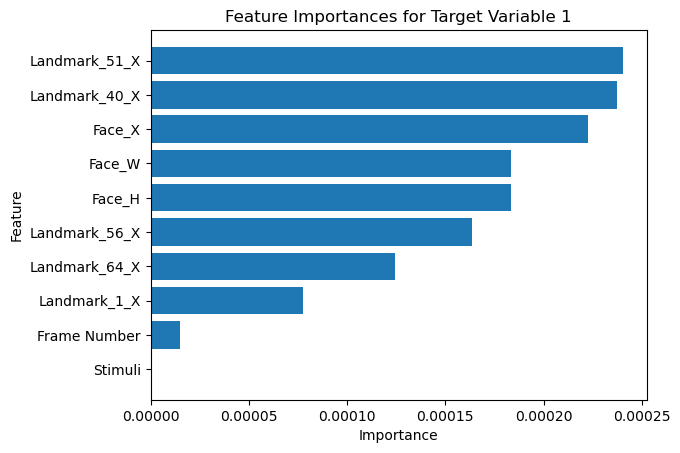

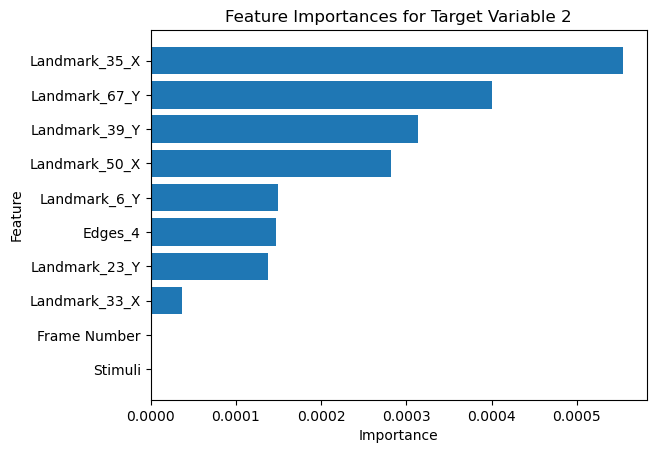

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

importances = []

# Iterate over each target variable
for i in range(y.shape[1]):
    # Select the current target variable
    y_single = y.iloc[:, i]

    model.fit(X, y_single)

    importances.append(np.abs(model.coef_))

features_columns = X.columns

# Print the feature importances for each target variable
for i in range(y.shape[1]):
    print(f"Target Variable {i+1} Importance:")
    for feature_name, importance in zip(features_columns, importances[i]):
        print(f"Feature: {feature_name}, Importance: {importance}")
    print()

for i in range(y.shape[1]):
    target_importances = importances[i]
    sorted_indices = np.argsort(target_importances)
    sorted_feature_names = features_columns[sorted_indices][:10]
    sorted_importances = target_importances[sorted_indices][:10]

    plt.figure()
    plt.barh(range(len(sorted_feature_names)), sorted_importances)
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for Target Variable {i+1}')
    plt.show()

In [74]:
features_columns

Index(['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W', 'Face_H',
       'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y',
       ...
       'Edges_9', 'Edges_10', 'Anger_Probability', 'Contempt_Probability',
       'Disgust_Probability', 'Fear_Probability', 'Happiness_Probability',
       'Neutral_Probability', 'Sadness_Probability', 'Surprise_Probability'],
      dtype='object', length=165)

### Gradient Boost Regressor

In [44]:
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor()

# importances = []

# # Iterate over each target variable
# for i in range(y.shape[1]):
#     # Select the current target variable
#     y_single = y.iloc[:, i]

#     # Fit the model to the data
#     model.fit(X, y_single)

#     # Compute the feature importances
#     importances.append(model.feature_importances_)

# features_columns = X.columns

# # Print the feature importances for each target variable
# for i in range(y.shape[1]):
#     print(f"Target Variable {i+1} Importance:")
#     for feature_name, importance in zip(features_columns, importances[i]):
#         print(f"Feature: {feature_name}, Importance: {importance}")
#     print()

# # Plot the feature importances for each target variable
# for i in range(y.shape[1]):
#     target_importances = importances[i]
#     sorted_indices = np.argsort(target_importances)
#     sorted_feature_names = features_columns[sorted_indices][:10]
#     sorted_importances = target_importances[sorted_indices][:10]

#     plt.figure()
#     plt.barh(range(len(sorted_feature_names)), sorted_importances)
#     plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
#     plt.xlabel('Importance')
#     plt.ylabel('Feature')
#     plt.title(f'Feature Importances for Target Variable {i+1}')
#     plt.show()

### SHAP

In [45]:
# import shap
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()

# model.fit(X, y)

# # Create a SHAP explainer
# explainer = shap.Explainer(model)

# # Calculate SHAP values for the data
# shap_values = explainer(X)

# # Reshape the SHAP values array
# shap_values_reshaped = shap_values[:, :, 0].reshape(X.shape[0], -1)
# shap_values_reshaped2 = shap_values[:, :, 1].reshape(X.shape[0], -1)

# # Convert SHAP values to DataFrames with feature names
# shap_df = pd.DataFrame(shap_values_reshaped, columns=X.columns)
# shap_df2 = pd.DataFrame(shap_values_reshaped2, columns=X.columns)

# print("SHAP Values for Target Variable 1:")
# print(shap_df)
# print("SHAP Values for Target Variable 2:")
# print(shap_df2)

# shap.summary_plot(shap_values, X)

In [46]:
# f = shap_values.abs().sum()
# fimpo = f / f.sum() * 100

In [47]:
# fimpo = shap_values.abs().idxmax(axis = 1).value_counts(normalize=True) * 100

In [48]:
# fimpo = shap_values.clip(lower = 0).abs().idxmax(axis = 1).value_counts(normalize = True) * 100

In [49]:
# fimpo = shap_values.clip(upper = 0).abs().idxmax(axis = 1).value_counts(normalize = True) * 100

### Modelling and Feature Selection

In [50]:
# !pip install pdpbox

In [51]:
# !pip install pdpipe

In [52]:
import numpy as np
import pandas as pd
import pdpipe as pdp

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

from typing import Dict, List, Tuple, Sequence

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Setting kfold for future use
kf = KFold(10, random_state=42, shuffle=True)

# Train our baseline LR Regression model for feature importance scoring/feature selection
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [54]:
def rfe_select_featurs(X, y, estimator, num_features):
    rfe_selector = RFE(estimator=estimator,
                       n_features_to_select=num_features,
                       step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')

    return rfe_feature

In [55]:
# total list of features
features_columns = X.columns
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Feature Importance Scores From Model and via RFE

In [56]:
# Do FRE feature importance scoring -
# stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X, y)
ranks["RFE_LR"] = ranking(list(map(float, rfe.ranking_)), features_columns, order=-1)

Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
F

### Creating the Feature Importance Dataframe

In [57]:
# all ranks
# Put the mean scores into a Pandas dataframe
rfe_lr_df = pd.DataFrame(list(ranks['RFE_LR'].items()), columns= ['Feature','rfe_importance'])

all_ranks = rfe_lr_df

display(all_ranks.head(10))

,Feature,rfe_importance
0,Stimuli,0.00
1,Frame Number,0.01
2,Face_Y,0.13
3,Face_X,0.12
4,Face_W,0.07
5,Face_H,0.12
6,Right_Eye_X,0.18
7,Right_Eye_Y,0.62
8,Left_Eye_X,0.27
9,Left_Eye_Y,0.50


### Permutable Feature Importance

In [58]:
from sklearn.inspection import permutation_importance

# Here's how you use permutation importance
def get_permutation_importance(X, y, model):
    result = permutation_importance(model, X, y, n_repeats=1,
                                random_state=0)

    # permutational importance results
    result_df = pd.DataFrame(features_columns,  columns=['Feature'])
    result_df['permutation_importance'] = result.get('importances')

    return result_df

In [72]:
permutate_df = get_permutation_importance(X, y, lr)
permutate_df.sort_values('permutation_importance',ascending=False)[['Feature','permutation_importance']][:20].style.background_gradient(cmap='Blues')

,Feature,permutation_importance
95,Landmark_43_X,124.290872
99,Landmark_45_X,118.555678
129,Landmark_60_X,112.221942
85,Landmark_38_X,71.033539
82,Landmark_37_Y,64.693639
86,Landmark_39_Y,64.175397
83,Landmark_37_X,63.804310
88,Landmark_40_Y,60.137112
69,Landmark_30_X,59.642640
31,Landmark_11_X,56.130235


### Drop-Column Importance

In [60]:
from sklearn.base import clone

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append( round( (benchmark_score - drop_col_score)/benchmark_score, 4) )

    importances_df = pd.DataFrame(X_train.columns, columns=['Feature'])
    importances_df['drop_col_importance'] = importances
    return importances_df

drop_col_impt_df = drop_col_feat_imp(lr, X, y)

In [61]:
drop_col_impt_df.sort_values('drop_col_importance', ascending=False)[['Feature','drop_col_importance']][:20].style.background_gradient(cmap='Blues')

,Feature,drop_col_importance
7,Right_Eye_Y,0.067200
9,Left_Eye_Y,0.029000
158,Contempt_Probability,0.023200
157,Anger_Probability,0.016800
129,Landmark_60_X,0.008100
95,Landmark_43_X,0.006500
88,Landmark_40_Y,0.006400
82,Landmark_37_Y,0.006100
99,Landmark_45_X,0.005400
161,Happiness_Probability,0.005100


### Merging All Feature Importance Metrics Into a Single Results Dataframe

In [62]:
# merge drop_col_impt_df
all_ranks = pd.merge(all_ranks, drop_col_impt_df, on=['Feature'])

# merge permutate_df
all_ranks = pd.merge(all_ranks, permutate_df, on=['Feature'])

# calculate average feature importance
average_fi_pipeline = pdp.PdPipeline([
    pdp.ApplyToRows(
        lambda row: (row['drop_col_importance'] + row['permutation_importance'] + row['rfe_importance'] )/3,
        colname='mean_feature_importance') # 'mean_feature_importance
])

all_ranks = average_fi_pipeline.apply(all_ranks)[:10]

display(all_ranks.reset_index().drop(['index'], axis=1).style.background_gradient(cmap='summer_r'))

,Feature,rfe_importance,drop_col_importance,permutation_importance,mean_feature_importance
0,Stimuli,0.000000,0.000100,0.000407,0.000169
1,Frame Number,0.010000,0.000000,0.000015,0.003338
2,Face_Y,0.130000,0.001600,1.903279,0.678293
3,Face_X,0.120000,0.000500,0.361558,0.160686
4,Face_W,0.070000,0.000000,0.076244,0.048748
5,Face_H,0.120000,0.000000,0.076244,0.065415
6,Right_Eye_X,0.180000,0.001300,1.072043,0.417781
7,Right_Eye_Y,0.620000,0.067200,7.319211,2.668804
8,Left_Eye_X,0.270000,0.003000,2.329110,0.867370
9,Left_Eye_Y,0.500000,0.029000,5.635146,2.054715


### Forecasting Model Experiments

In [63]:
def get_top_features_by_rank(metric_col_name: str, feature_number: int):
    features_df = all_ranks.copy()

    # features_df = features_df.sort_values(by=['feature_number'])

    # TODO: [:feature_number]

    # top n rows ordered by multiple columns
    features_df = features_df.nlargest(feature_number, [metric_col_name])

    result_list = list(features_df['Feature'])
    return result_list

def model_check(X, y, estimator, model_name, model_description, cv):
    model_table = pd.DataFrame()

    cv_results = cross_validate(estimator,
                                X,
                                y,
                                cv=cv,
                                scoring='neg_root_mean_squared_error',
                                return_train_score=True,
                                n_jobs=-1)

    train_rmse = -cv_results['train_score'].mean()
    test_rmse = -cv_results['test_score'].mean()
    test_std = cv_results['test_score'].std()
    fit_time = cv_results['fit_time'].mean()

    attributes = {
        'model_name': model_name,
        'train_score': train_rmse,
        'test_score': test_rmse,
        'test_std': test_std,
        'fit_time': fit_time,
        'description': model_description,
    }

    model_table = pd.DataFrame(data=[attributes])
    return model_table

In [64]:
# check the baseline LR
baseline = model_check(X, y, lr, 'Baseline LR', "Baseline LR (all features)", kf)
result_df = baseline

### train a number of LR models that use only top X features as ranked by RFE feature importance/feature selection algorithm.

In [65]:
# subset of features selected by RFE feature importance
top_rfe_features = 50
rfe_features = get_top_features_by_rank('rfe_importance', top_rfe_features)
X_important_features = X[rfe_features]

model_check_df = model_check(X_important_features, y, lr, 'LR - Top RFE Features', "Top 50 RFE Features", kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_rfe_features = 100
rfe_features = get_top_features_by_rank('rfe_importance', top_rfe_features)
X_important_features = X[rfe_features]

model_check_df = model_check(X_important_features, y, lr, 'LR - Top RFE Features', "Top 100 RFE Features", kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_rfe_features = 150
rfe_features = get_top_features_by_rank('rfe_importance', top_rfe_features)
X_important_features = X[rfe_features]

model_check_df = model_check(X_important_features, y, lr, 'LR - Top RFE Features', "Top 150 RFE Features", kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

### train one more set of LR models that use top features selected by permutation method

In [66]:
# train LR with the top importance feautres selected via the permutation method
top_features = 50
important_features = get_top_features_by_rank('permutation_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} permutatively important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Permutatively Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_features = 100
important_features = get_top_features_by_rank('permutation_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} permutatively important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Permutatively Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_features = 150
important_features = get_top_features_by_rank('permutation_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} permutatively important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Permutatively Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

### train a set of LR models with the top features selected by drop-column method

In [67]:
# train LR with the top importance feautres selected via the drop-column method
top_features = 50
important_features = get_top_features_by_rank('drop_col_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} drop-col-important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Drop-Column Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_features = 100
important_features = get_top_features_by_rank('drop_col_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} drop-col-important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Drop-Column Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

top_features = 150
important_features = get_top_features_by_rank('drop_col_importance', top_features)
X_important_features = X[important_features]

description = "LR with top {} drop-col-important features".format(top_features)
model_check_df = model_check(X_important_features, y, lr, 'LR - Drop-Column Important Features', description, kf)

# concatenate
frames = [result_df, model_check_df]
result_df = pd.concat(frames)

### display and compare the results of scoring each of the trained model

In [75]:
display(result_df.reset_index().drop(['index'], axis=1).style.background_gradient(cmap='summer_r'))

,model_name,train_score,test_score,test_std,fit_time,description
0,Baseline LR,0.215254,0.215659,0.000769,10.813915,Baseline LR (all features)
1,LR - Top RFE Features,0.254208,0.254231,0.000691,0.311406,Top 50 RFE Features
2,LR - Top RFE Features,0.254208,0.254231,0.000691,0.295461,Top 100 RFE Features
3,LR - Top RFE Features,0.254208,0.254231,0.000691,0.272444,Top 150 RFE Features
4,LR - Permutatively Important Features,0.254208,0.254231,0.000691,0.233081,LR with top 50 permutatively important features
5,LR - Permutatively Important Features,0.254208,0.254231,0.000691,0.235678,LR with top 100 permutatively important features
6,LR - Permutatively Important Features,0.254208,0.254231,0.000691,0.236902,LR with top 150 permutatively important features
7,LR - Drop-Column Important Features,0.254208,0.254231,0.000691,0.281674,LR with top 50 drop-col-important features
8,LR - Drop-Column Important Features,0.254208,0.254231,0.000691,0.287003,LR with top 100 drop-col-important features
9,LR - Drop-Column Important Features,0.254208,0.254231,0.000691,0.290474,LR with top 150 drop-col-important features


### METHOD PCA

### Osven PCA sto e za namaluvanje na dimenzijata, moze da se koristi i za odreduanje na vaznosta na karakteristikite.Ne gi pokazuva direktno, no vrakja n glavni komponenti

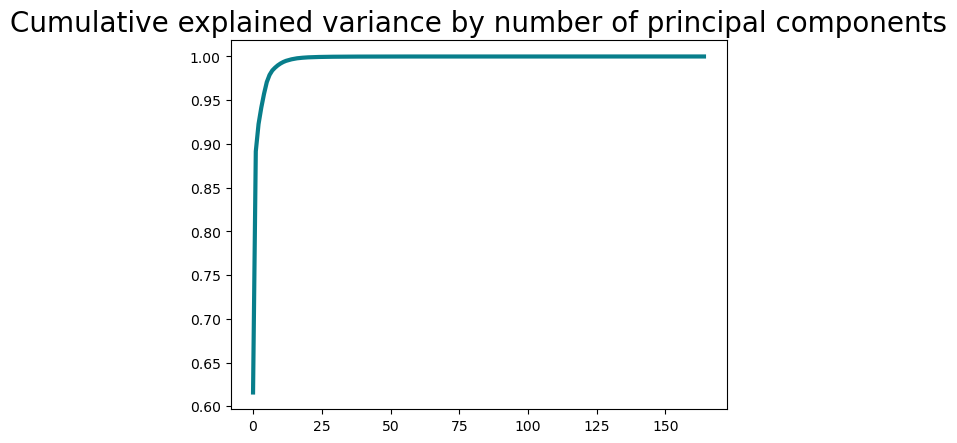

In [69]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scal)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

### Gi vadi prvite 5 vazni komponenti, spored varijansata. Tuka ako ima korelacija pomegju aktuelnata komponenta i orginalnata valirijabla, znaci deka taa kolona deka e vazna.

In [70]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165
Stimuli,-0.020847,-0.001650,-0.033157,0.308388,-0.019517,0.007083,0.010394,-0.000382,-0.000829,0.003191,...,-6.415736e-09,-6.149521e-32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frame Number,0.026375,0.002831,-0.032961,-0.013387,-0.229313,-0.150784,-0.017144,0.001272,0.002627,0.005276,...,4.308164e-09,1.630518e-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Face_Y,0.075770,0.128044,-0.035359,-0.002440,-0.002141,0.006719,-0.005798,-0.000118,-0.003274,0.000204,...,-4.265777e-07,1.967992e-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Face_X,-0.183348,0.063581,-0.060390,-0.003710,-0.001913,0.010130,-0.009673,-0.002728,0.001900,-0.001578,...,-4.444106e-08,7.488320e-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Face_W,-0.046619,-0.047573,0.183698,0.012725,0.007652,-0.029849,0.026704,-0.004675,0.011625,0.002989,...,-3.540375e-08,5.582717e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


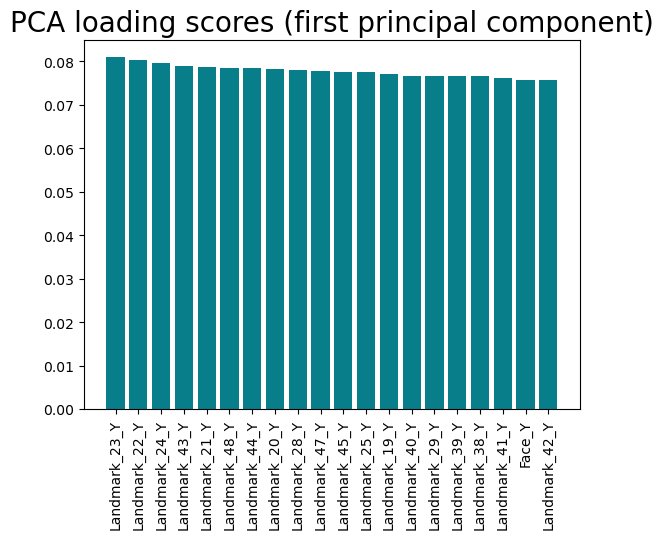

In [71]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']][:10]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()